# <center>CS-485 Data Science and Applications</center>
## <center>Assignment 3</center>
### <center>Alexandros Angelakis csdp1363, angelakis@csd.uoc.gr</center>

In [1]:
# imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Loading the Dataset

Load the Wine dataset using load_wine from sklearn.datasets.
Inspect the dataset to understand its structure and features.

In [2]:
from sklearn.datasets import load_wine

data = load_wine().data
print(data.shape, "-> 178 samples with 13 classes")

labels = load_wine().target
print(labels.shape, "-> 178 labels, one for each sample")
print(labels)

names = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phelons', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline', 'Classes']
labels = np.reshape(labels, (labels.shape[0], 1))
data = np.concatenate([data, labels], axis=-1)
dataset = pd.DataFrame(data, columns=names)
dataset['Classes'].replace(0, 'class_0', inplace=True)
dataset['Classes'].replace(1, 'class_1', inplace=True)
dataset['Classes'].replace(2, 'class_2', inplace=True)

dataset.head()

(178, 13) -> 178 samples with 13 classes
(178,) -> 178 labels, one for each sample
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phelons,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Classes
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [3]:
dataset.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phelons,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Data Normalization

Standardize the features using StandardScaler from sklearn.preprocessing.
Explore the effects of data normalization on model performance with different normalization techniques.

In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize the standard scaler
sts = StandardScaler()

# Extract numerical features
numerical_features = dataset.drop('Classes', axis=1)

# Perform normalization
normalized_data_sts = sts.fit_transform(numerical_features)

# Convert the normalized data back to DataFrame
normalized_dataset_sts = pd.DataFrame(normalized_data_sts, columns=numerical_features.columns)

# Concatenate the normalized features with the 'Classes' column
normalized_dataset_sts['Classes'] = dataset['Classes']

normalized_dataset_sts.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phelons,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


Now we are going to use the MinMaxScaler from sklearn.preprocessing, to check if it's a better normalization tecnhique for our data.

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMax Scaler
minmax = MinMaxScaler()

# Extract numerical features
numerical_features = dataset.drop('Classes', axis=1)

# Perform normalization
normalized_data_minmax = minmax.fit_transform(numerical_features)

# Convert the normalized data back to DataFrame
normalized_dataset_minmax = pd.DataFrame(normalized_data_minmax, columns=numerical_features.columns)

# Concatenate the normalized features with the 'Classes' column
normalized_dataset_minmax['Classes'] = dataset['Classes']

normalized_dataset_minmax.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phelons,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Preprocessing

- Split the dataset into features and target labels.
- Split the data into training and testing sets using train_test_split from sklearn.model_selection.

Now we are going to split all the datasets derived from the previous normalization methods, train each one and evaluate them.
First of all, we are going to split and train the dataset as it is, without normalization.

In [6]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% test
train_data, test_data, train_labels, test_labels = train_test_split(dataset.iloc[:, :13], labels, test_size=0.2, random_state=0, shuffle=True)

# Split the remaining 20% into half for validation and half for testing
val_data, test_data, val_labels, test_labels = train_test_split(test_data, test_labels, test_size=0.5, random_state=0, shuffle=True)

print(f'shapes of train_data: {train_data.shape}, train_labels: {train_labels.shape}, test_data: {test_data.shape}, test_labels: {test_labels.shape}')

shapes of train_data: (142, 13), train_labels: (142, 1), test_data: (18, 13), test_labels: (18, 1)


Splitting the normalized data from the Standard Scaler

In [7]:
# Split data into 80% training and 20% test
train_data_sts, test_data_sts, train_labels_sts, test_labels_sts = train_test_split(normalized_dataset_sts.iloc[:, :13], labels, test_size=0.2, random_state=0, shuffle=True)

# Split the remaining 20% into half for validation and half for testing
val_data_sts, test_data_sts, val_labels_sts, test_labels_sts = train_test_split(test_data_sts, test_labels_sts, test_size=0.5, random_state=0, shuffle=True)

print(f'shapes of train_data: {train_data_sts.shape}, train_labels: {train_labels_sts.shape}, test_data: {test_data_sts.shape}, test_labels: {test_labels_sts.shape}')

shapes of train_data: (142, 13), train_labels: (142, 1), test_data: (18, 13), test_labels: (18, 1)


Splitting the normalized data from the MinMax Scaler

In [8]:
# Split data into 80% training and 20% test
train_data_minmax, test_data_minmax, train_labels_minmax, test_labels_minmax = train_test_split(normalized_dataset_minmax.iloc[:, :13], labels, test_size=0.2, random_state=0, shuffle=True)

# Split the remaining 20% into half for validation and half for testing
val_data_minmax, test_data_minmax, val_labels_minmax, test_labels_minmax = train_test_split(test_data_minmax, test_labels_minmax, test_size=0.5, random_state=0, shuffle=True)

print(f'shapes of train_data: {train_data_minmax.shape}, train_labels: {train_labels_minmax.shape}, test_data: {test_data_minmax.shape}, test_labels: {test_labels_minmax.shape}')

shapes of train_data: (142, 13), train_labels: (142, 1), test_data: (18, 13), test_labels: (18, 1)


# Baseline Model

Train a baseline SVM model using default hyperparameters.
Evaluate the model's performance on the testing set using metrics like accuracy, precision, recall, and F1-score. Experiment with different kernel functions (e.g., linear, polynomial, RBF) and observe their effects on model performance.

As we did before, we are going to train our models using different data, with varying normalizations.
Starting with the non normalized data.

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

print('SVM using the default hyperparameters')
svm_baseline = SVC()

# Fit the model
svm_baseline.fit(train_data, np.ravel(train_labels))

# Compute accuracy on the training set
train_accuracy_baseline = svm_baseline.score(train_data, train_labels)

# Compute accuracy on the validation set
val_accuracy_baseline = svm_baseline.score(val_data, val_labels)

#the predicted labels for the test set
predictions_baseline = svm_baseline.predict(test_data)
predictions_baseline = np.reshape(predictions_baseline,(len(predictions_baseline),1))
print(classification_report(test_labels, predictions_baseline))

print('=====================================================\n')

print('SVM using the linear kernel type')
svm_linear = SVC(kernel='linear')

# Fit the model
svm_linear.fit(train_data, np.ravel(train_labels))

# Compute accuracy on the training set
train_accuracy_linear = svm_linear.score(train_data, train_labels)

# Compute accuracy on the validation set
val_accuracy_linear = svm_linear.score(val_data, val_labels)

#the predicted labels for the test set
predictions_linear = svm_linear.predict(test_data)
predictions_linear = np.reshape(predictions_linear,(len(predictions_linear),1))
print(classification_report(test_labels, predictions_linear))

print('=====================================================\n')

print('SVM using the poly kernel type')
svm_poly = SVC(kernel='poly')

# Fit the model
svm_poly.fit(train_data, np.ravel(train_labels))

# Compute accuracy on the training set
train_accuracy_poly = svm_poly.score(train_data, train_labels)

# Compute accuracy on the validation set
val_accuracy_poly = svm_poly.score(val_data, val_labels)

#the predicted labels for the test set
predictions_poly = svm_poly.predict(test_data)
predictions_poly = np.reshape(predictions_poly,(len(predictions_poly),1))
print(classification_report(test_labels, predictions_poly))

print('=====================================================\n')

print('SVM using the sigmoid kernel type')
svm_sigmoid = SVC(kernel='poly')

# Fit the model
svm_sigmoid.fit(train_data, np.ravel(train_labels))

# Compute accuracy on the training set
train_accuracy_sigmoid = svm_sigmoid.score(train_data, train_labels)

# Compute accuracy on the validation set
val_accuracy_sigmoid = svm_sigmoid.score(val_data, val_labels)

#the predicted labels for the test set
predictions_sigmoid = svm_sigmoid.predict(test_data)
predictions_sigmoid = np.reshape(predictions_sigmoid,(len(predictions_sigmoid),1))
print(classification_report(test_labels, predictions_sigmoid))

SVM using the default hyperparameters
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.88      0.78      0.82         9
           2       0.40      0.67      0.50         3

    accuracy                           0.78        18
   macro avg       0.76      0.76      0.74        18
weighted avg       0.84      0.78      0.80        18


SVM using the linear kernel type
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


SVM using the poly kernel type
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.82  

Now with the data normalized from a Standard Scaler

In [10]:
print('SVM using the default hyperparameters')
svm_baseline = SVC()

# Fit the model
svm_baseline.fit(train_data_sts, np.ravel(train_labels_sts))

# Compute accuracy on the training set
train_accuracy_baseline = svm_baseline.score(train_data_sts, train_labels_sts)

# Compute accuracy on the validation set
val_accuracy_baseline = svm_baseline.score(val_data_sts, val_labels_sts)

#the predicted labels for the test set
predictions_baseline = svm_baseline.predict(test_data_sts)
predictions_baseline = np.reshape(predictions_baseline,(len(predictions_baseline),1))
print(classification_report(test_labels_sts, predictions_baseline))

print('=====================================================\n')

print('SVM using the linear kernel type')
svm_linear = SVC(kernel='linear')

# Fit the model
svm_linear.fit(train_data_sts, np.ravel(train_labels_sts))

# Compute accuracy on the training set
train_accuracy_linear = svm_linear.score(train_data_sts, train_labels_sts)

# Compute accuracy on the validation set
val_accuracy_linear = svm_linear.score(val_data_sts, val_labels_sts)

#the predicted labels for the test set
predictions_linear = svm_linear.predict(test_data_sts)
predictions_linear = np.reshape(predictions_linear,(len(predictions_linear),1))
print(classification_report(test_labels_sts, predictions_linear))

print('=====================================================\n')

print('SVM using the poly kernel type')
svm_poly = SVC(kernel='poly')

# Fit the model
svm_poly.fit(train_data_sts, np.ravel(train_labels_sts))

# Compute accuracy on the training set
train_accuracy_poly = svm_poly.score(train_data_sts, train_labels_sts)

# Compute accuracy on the validation set
val_accuracy_poly = svm_poly.score(val_data_sts, val_labels_sts)

#the predicted labels for the test set
predictions_poly = svm_poly.predict(test_data_sts)
predictions_poly = np.reshape(predictions_poly,(len(predictions_poly),1))
print(classification_report(test_labels_sts, predictions_poly))

print('=====================================================\n')

print('SVM using the sigmoid kernel type')
svm_sigmoid = SVC(kernel='poly')

# Fit the model
svm_sigmoid.fit(train_data_sts, np.ravel(train_labels_sts))

# Compute accuracy on the training set
train_accuracy_sigmoid = svm_sigmoid.score(train_data_sts, train_labels_sts)

# Compute accuracy on the validation set
val_accuracy_sigmoid = svm_sigmoid.score(val_data_sts, val_labels_sts)

#the predicted labels for the test set
predictions_sigmoid = svm_sigmoid.predict(test_data_sts)
predictions_sigmoid = np.reshape(predictions_sigmoid,(len(predictions_sigmoid),1))
print(classification_report(test_labels_sts, predictions_sigmoid))

SVM using the default hyperparameters
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


SVM using the linear kernel type
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


SVM using the poly kernel type
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00  

Now for the MinMax Scaler

In [11]:
print('SVM using the default hyperparameters')
svm_baseline = SVC()

# Fit the model
svm_baseline.fit(train_data_minmax, np.ravel(train_labels_minmax))

# Compute accuracy on the training set
train_accuracy_baseline = svm_baseline.score(train_data_minmax, train_labels_minmax)

# Compute accuracy on the validation set
val_accuracy_baseline = svm_baseline.score(val_data_minmax, val_labels_minmax)

#the predicted labels for the test set
predictions_baseline = svm_baseline.predict(test_data_minmax)
predictions_baseline = np.reshape(predictions_baseline,(len(predictions_baseline),1))
print(classification_report(test_labels_minmax, predictions_baseline))

print('=====================================================\n')

print('SVM using the linear kernel type')
svm_linear = SVC(kernel='linear')

# Fit the model
svm_linear.fit(train_data_minmax, np.ravel(train_labels_minmax))

# Compute accuracy on the training set
train_accuracy_linear = svm_linear.score(train_data_minmax, train_labels_minmax)

# Compute accuracy on the validation set
val_accuracy_linear = svm_linear.score(val_data_minmax, val_labels_minmax)

#the predicted labels for the test set
predictions_linear = svm_linear.predict(test_data_minmax)
predictions_linear = np.reshape(predictions_linear,(len(predictions_linear),1))
print(classification_report(test_labels_minmax, predictions_linear))

print('=====================================================\n')

print('SVM using the poly kernel type')
svm_poly = SVC(kernel='poly')

# Fit the model
svm_poly.fit(train_data_minmax, np.ravel(train_labels_minmax))

# Compute accuracy on the training set
train_accuracy_poly = svm_poly.score(train_data_minmax, train_labels_minmax)

# Compute accuracy on the validation set
val_accuracy_poly = svm_poly.score(val_data_minmax, val_labels_minmax)

#the predicted labels for the test set
predictions_poly = svm_poly.predict(test_data_minmax)
predictions_poly = np.reshape(predictions_poly,(len(predictions_poly),1))
print(classification_report(test_labels_minmax, predictions_poly))

print('=====================================================\n')

print('SVM using the sigmoid kernel type')
svm_sigmoid = SVC(kernel='poly')

# Fit the model
svm_sigmoid.fit(train_data_minmax, np.ravel(train_labels_minmax))

# Compute accuracy on the training set
train_accuracy_sigmoid = svm_sigmoid.score(train_data_minmax, train_labels_minmax)

# Compute accuracy on the validation set
val_accuracy_sigmoid = svm_sigmoid.score(val_data_minmax, val_labels_minmax)

#the predicted labels for the test set
predictions_sigmoid = svm_sigmoid.predict(test_data_minmax)
predictions_sigmoid = np.reshape(predictions_sigmoid,(len(predictions_sigmoid),1))
print(classification_report(test_labels_minmax, predictions_sigmoid))

SVM using the default hyperparameters
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


SVM using the linear kernel type
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


SVM using the poly kernel type
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00  

As we can see, the best normalization method is the MinMax.

# Hyperparameter Tuning

Perform hyperparameter tuning to find the best combination of hyperparameters for the SVM model.
Tune hyperparameters such as C (regularization parameter) and the choice of kernel (linear, polynomial, RBF).
Use techniques like GridSearchCV or RandomizedSearchCV from sklearn.model_selection to efficiently search through the hyperparameter space.
Evaluate the performance of **tuned models** on the testing set.

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': np.arange(0.1, 10, 0.2),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 0.5, 1, 'scale', 'auto']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_baseline, param_grid=param_grid, cv=5)

# Fit the model with the grid of hyperparameters
grid_search.fit(train_data_minmax, train_labels_minmax.ravel())

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
predictions = best_model.predict(test_data_minmax)
accuracy_best = best_model.score(test_data_minmax, test_labels_minmax)
print(f"Best SVM Accuracy on test data: {accuracy_best:.2f}")
print(f"Best Hyperparameters: {best_params}")

predictions = np.reshape(predictions,(len(predictions),1))
print(classification_report(test_labels_minmax, predictions))

Best SVM Accuracy on test data: 1.00
Best Hyperparameters: {'C': 1.7000000000000004, 'gamma': 0.5, 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



# Effects of Data Size

Explore the effects of varying the size of the training data on model performance.
Train SVM models using different proportions of the training data and observe how performance changes (change the data split ratio).
Plot learning curves to visualize the relationship between training size and model performance.

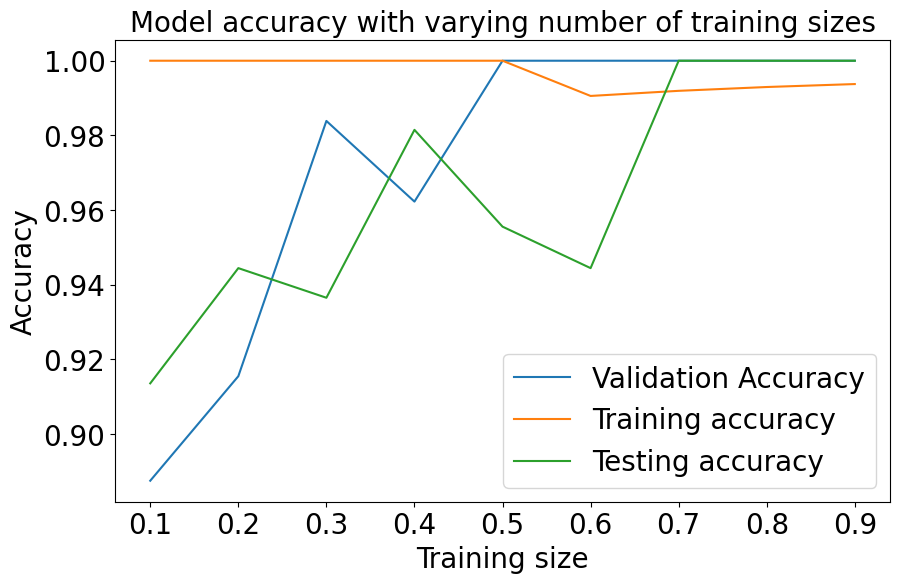

In [13]:
train_sizes = np.array(np.arange(0.1, 1, 0.1))

train_accuracy = np.zeros(len(train_sizes))
val_accuracy = np.zeros(len(train_sizes))
test_accuracy = np.zeros(len(train_sizes))

for i, train_size in enumerate(train_sizes):
    train_data_minmax, test_data_minmax, train_labels_minmax, test_labels_minmax = train_test_split(normalized_dataset_minmax.iloc[:, :13], labels, test_size=(1-train_size), random_state=0, shuffle=True)

    val_data_minmax, test_data_minmax, val_labels_minmax, test_labels_minmax = train_test_split(test_data_minmax, test_labels_minmax, test_size=0.5, random_state=0, shuffle=True)

    # using the best hyperparameters
    svm_poly = SVC(C=1.7, gamma=0.5, kernel='poly')

    # Fit the model
    svm_poly.fit(train_data_minmax, np.ravel(train_labels_minmax))

    # Compute accuracy on the training set
    train_accuracy[i] = svm_poly.score(train_data_minmax, train_labels_minmax)

    # Compute accuracy on the validation set
    val_accuracy[i] = svm_poly.score(val_data_minmax, val_labels_minmax)

    # Compute accuracy on the testing set
    test_accuracy[i] = svm_poly.score(test_data_minmax, test_labels_minmax)


plt.figure(figsize=(10,6))
plt.title('Model accuracy with varying number of training sizes', fontsize=20)
plt.plot(train_sizes, val_accuracy, label='Validation Accuracy')
plt.plot(train_sizes, train_accuracy, label='Training accuracy')
plt.plot(train_sizes, test_accuracy, label='Testing accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Training size',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

As we can see from the plot, the best training sizes are 0.7, 0.8 and 0.9. That is because the validation, training and testing accuracy have their maximum value. So the more training data we have to fit our model, the better.

# Model Evaluation

Evaluate the final tuned SVM model on the testing set using various performance metrics.
Plot confusion matrices to visualize the model's predictions.
Discuss the results and insights gained from the experimentation.

Let's wrap everything up!

shapes of train_data: (142, 13), train_labels: (142, 1), test_data: (18, 13), test_labels: (18, 1)


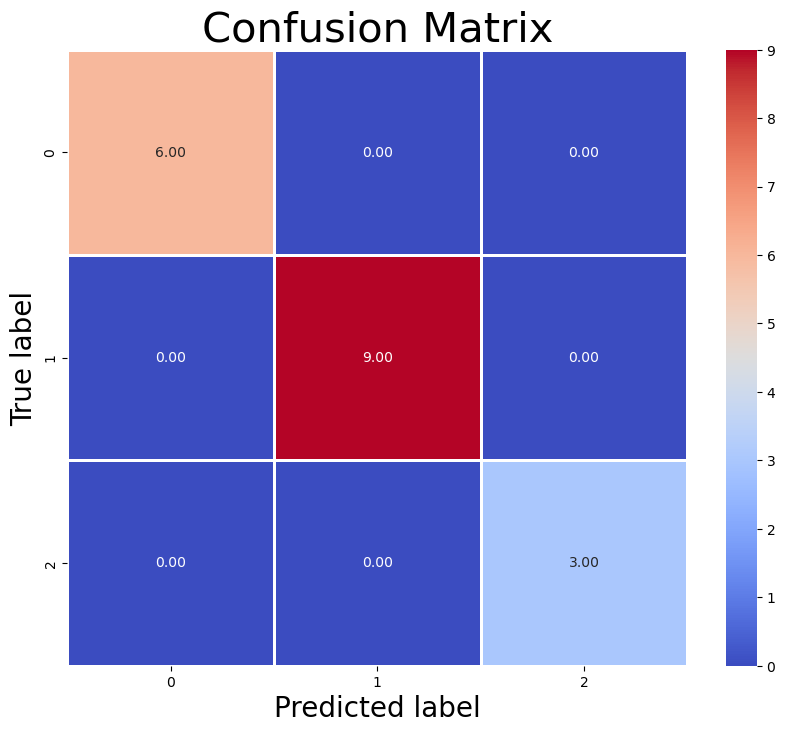

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Training accuracy: 0.99, validation accuracy: 1.0 and test accuracy: 1.0


In [14]:
from sklearn.metrics import confusion_matrix

# Initialize the MinMax Scaler
minmax = MinMaxScaler()

# Extract numerical features
numerical_features = dataset.drop('Classes', axis=1)

# Perform normalization
normalized_data_minmax = minmax.fit_transform(numerical_features)

# Convert the normalized data back to DataFrame
normalized_dataset_minmax = pd.DataFrame(normalized_data_minmax, columns=numerical_features.columns)

# Concatenate the normalized features with the 'Classes' column
normalized_dataset_minmax['Classes'] = dataset['Classes']

# Split data into 80% training and 20% test
train_data_minmax, test_data_minmax, train_labels_minmax, test_labels_minmax = train_test_split(normalized_dataset_minmax.iloc[:, :13], labels, test_size=0.2, random_state=0, shuffle=True)

# Split the remaining 20% into half for validation and half for testing
val_data_minmax, test_data_minmax, val_labels_minmax, test_labels_minmax = train_test_split(test_data_minmax, test_labels_minmax, test_size=0.5, random_state=0, shuffle=True)

print(f'shapes of train_data: {train_data_minmax.shape}, train_labels: {train_labels_minmax.shape}, test_data: {test_data_minmax.shape}, test_labels: {test_labels_minmax.shape}')

# using the best hyperparameters
svm_poly = SVC(C=1.7, gamma=0.5, kernel='poly')

# Fit the model
svm_poly.fit(train_data_minmax, np.ravel(train_labels_minmax))
 
# Compute accuracy on the training set
train_accuracy = svm_poly.score(train_data_minmax, train_labels_minmax)

# Compute accuracy on the validation set
val_accuracy = svm_poly.score(val_data_minmax, val_labels_minmax)

# Compute accuracy on the test set
test_accuracy = svm_poly.score(test_data_minmax, test_labels_minmax)

predictions = svm_poly.predict(test_data_minmax)
predictions = np.reshape(predictions,(len(predictions),1))

# Plotting the confusion matrix
cnf_matrix = confusion_matrix(test_labels_minmax, predictions)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix', fontsize=30)
sns.heatmap(cnf_matrix, annot=True, fmt='.2f', linewidth=2, cmap='coolwarm')
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()
plt.close()

# Printing the classification report
print(classification_report(test_labels_minmax, predictions))
print(f'Training accuracy: {train_accuracy:.2f}, validation accuracy: {val_accuracy} and test accuracy: {test_accuracy}')

The baseline model was good enough, every metric was 1 so all those experiments we did were unnecessary :D. But it was worth the try. 
Every modification that we did in order to make our model better on classifying the wines, from tuning the hyperparameters to changing the normalization tecnique and the training size, did not have any major impact on our model's performance.
But in the end, our final tuned SVM had the best possible metrics.